<a href="https://colab.research.google.com/github/Janesh-e/DS-Projects/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

import random
from itertools import combinations
import itertools

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

Pandas version: 2.0.3
NumPy version: 1.25.2
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
Scikit-learn version: 1.2.2
TensorFlow version: 2.15.0


# **2. Loading and Inspecting the Data**

In [ ]:
# Load the data
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the shape of the dataset (number of rows and columns)
print(f"Shape of the dataset: {data.shape}")

# Get information about the dataset (data types, non-null values, etc.)
print(data.info())

# Display summary statistics for the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Shape of the dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

In [ ]:
#Group data by 'Outcome', which is the class of interest for our analysis
print(data.groupby('Outcome').mean())

#counting number of 0 and 1 in Outcome
data['Outcome'].value_counts()

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


Outcome
0    500
1    268
Name: count, dtype: int64

# **3. Data Visualization**

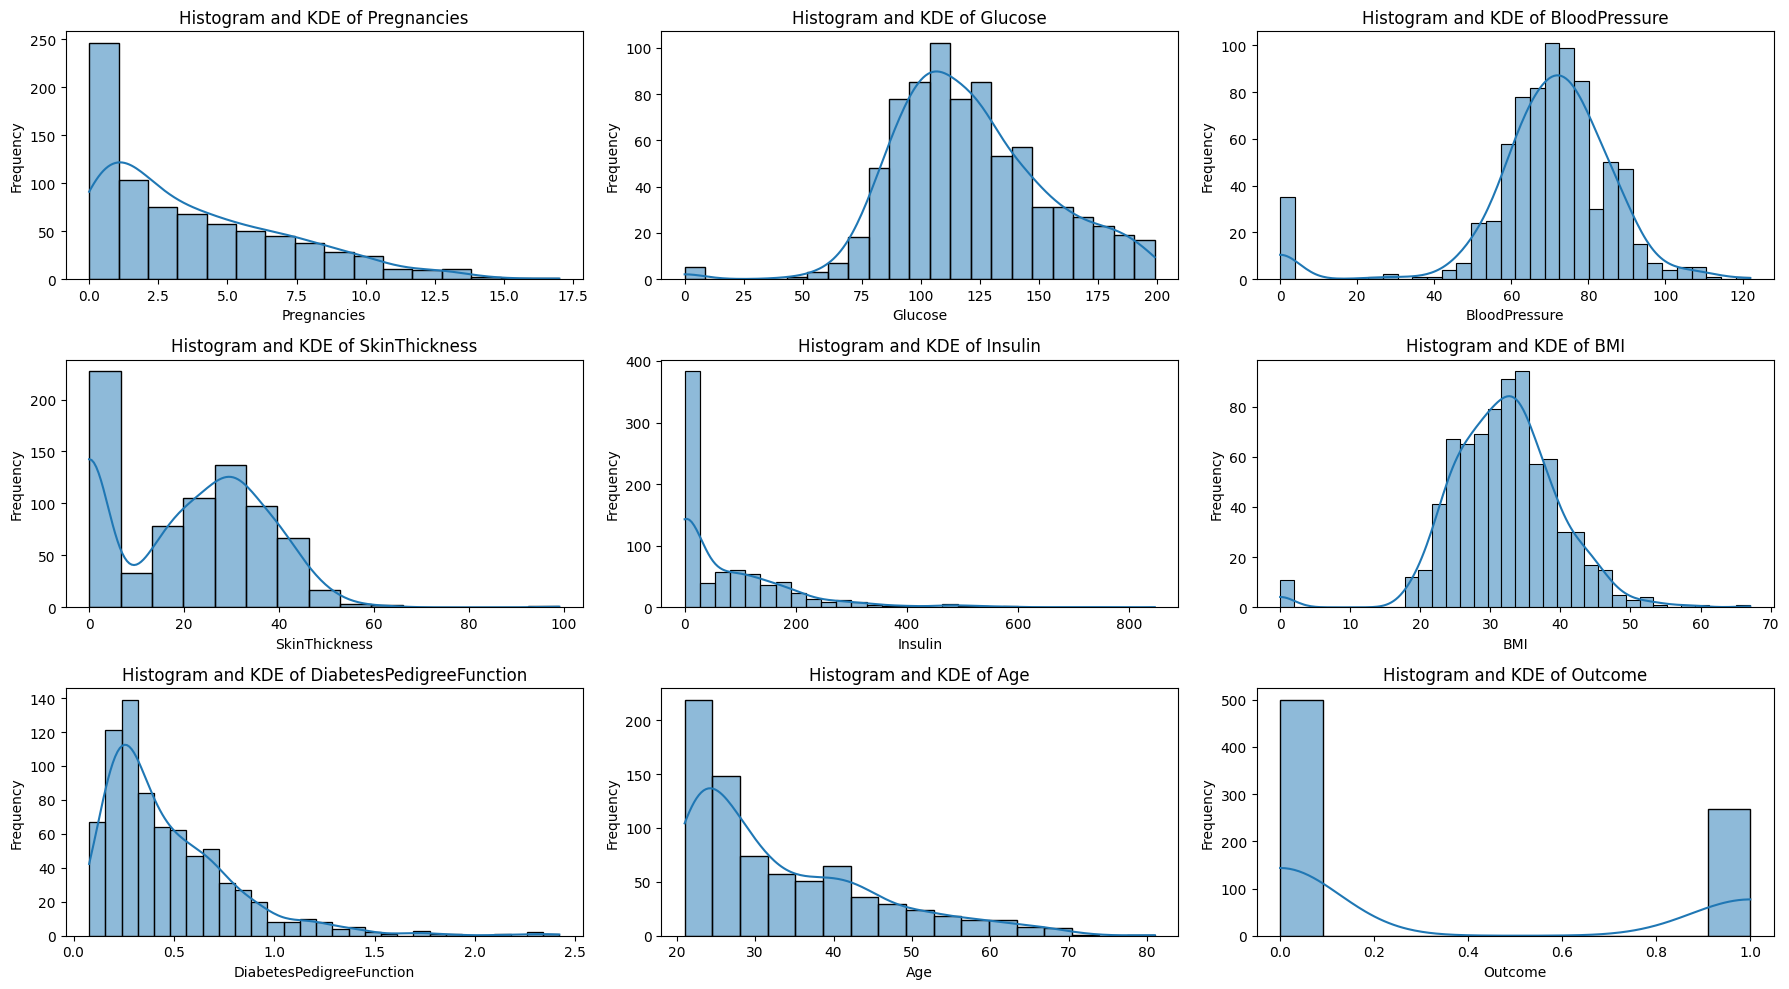

In [ ]:
features = data.columns  # features to plot

# Create a figure and set of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

# Plot each feature in a separate subplot
for ax, feature in zip(axes.flatten(), features):
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(f'Histogram and KDE of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

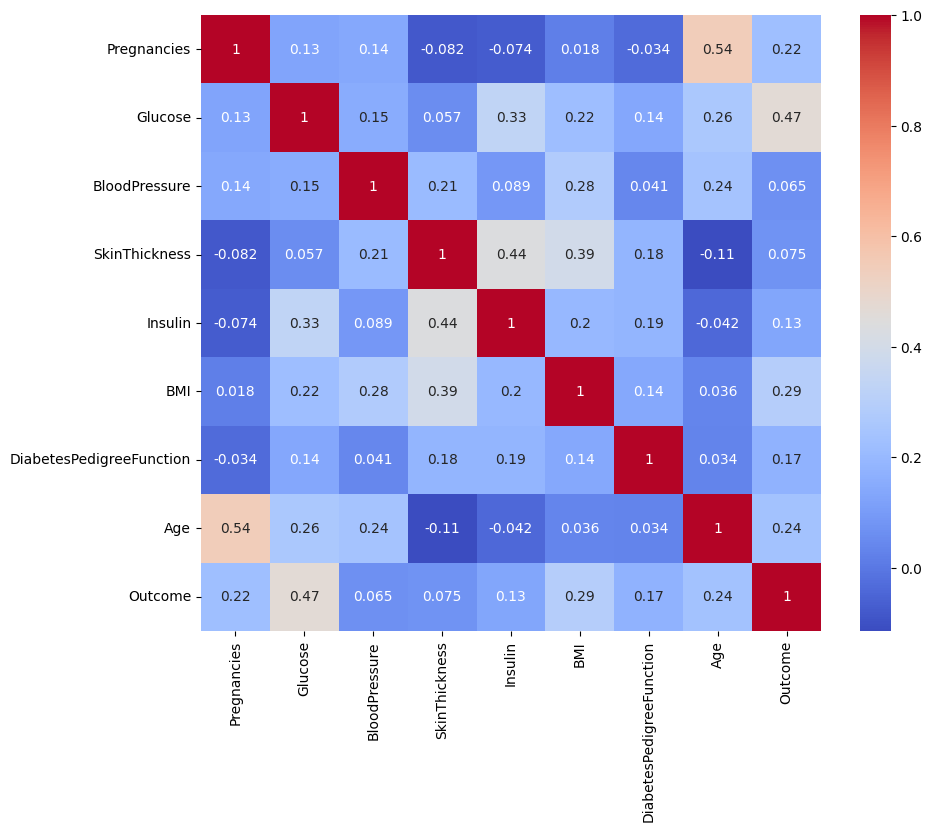

In [ ]:
# Correlation matrix to see relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **4. Data Cleaning and Preprocessing**

In [ ]:
# Replace zero values in certain columns with the column mean
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column] = data[column].replace(0, data[column].mean())

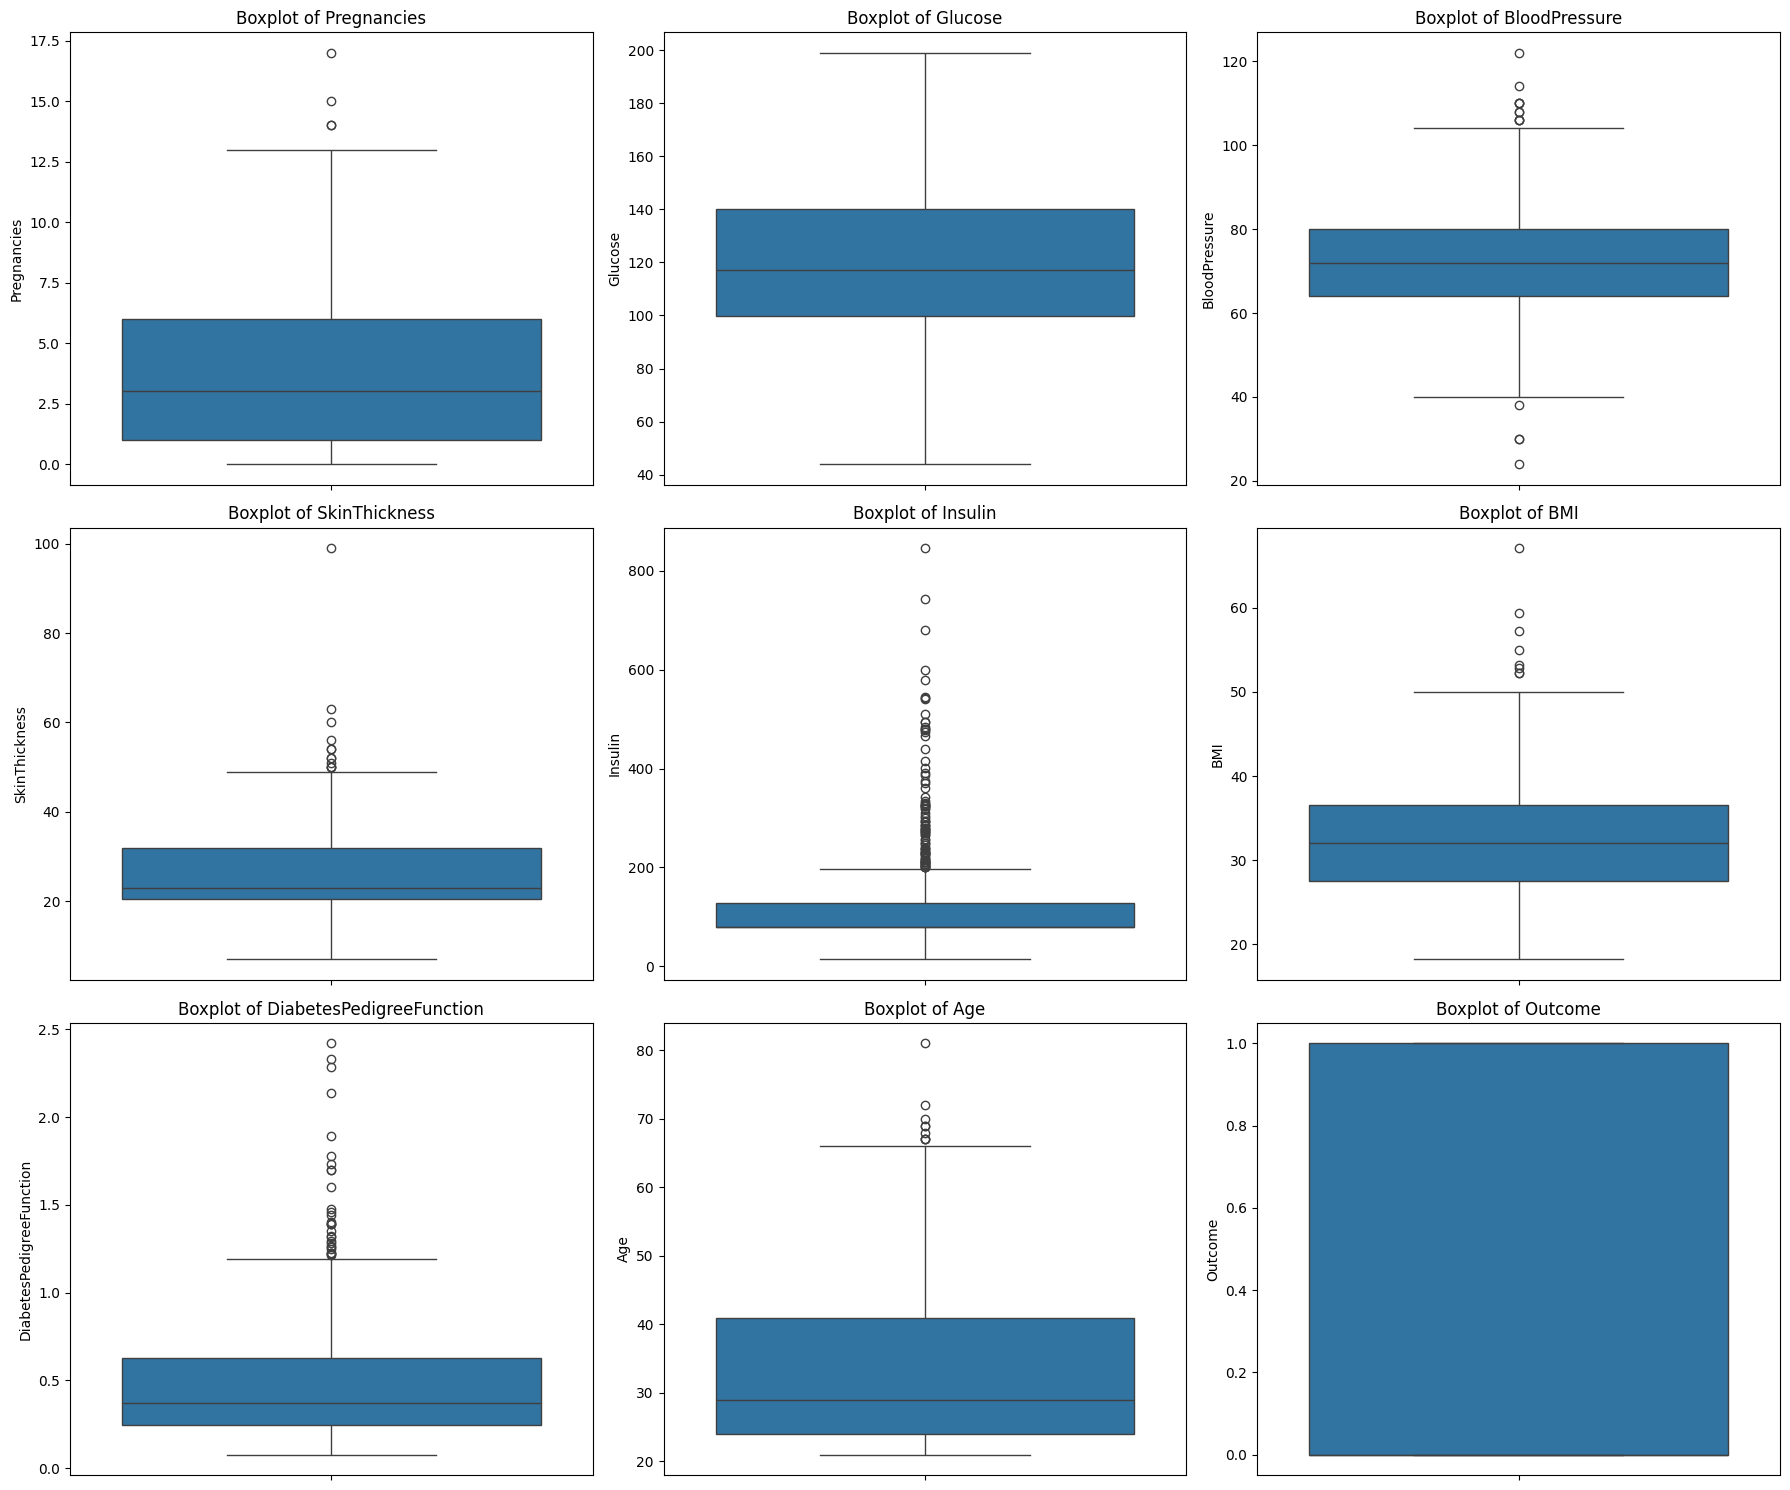

In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Plot each feature in a separate subplot
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(y=data[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outlier_criteria = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Remove outliers
data_no_outliers = data[~outlier_criteria.any(axis=1)]

print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_no_outliers.shape}")

Original data shape: (768, 9)
Data shape after removing outliers: (619, 9)


In [ ]:
# Separate features and target variable
X = data_no_outliers.drop(['Outcome'], axis=1)
y = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# **5. Data Splitting**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **6. Feature Importance Analysis**

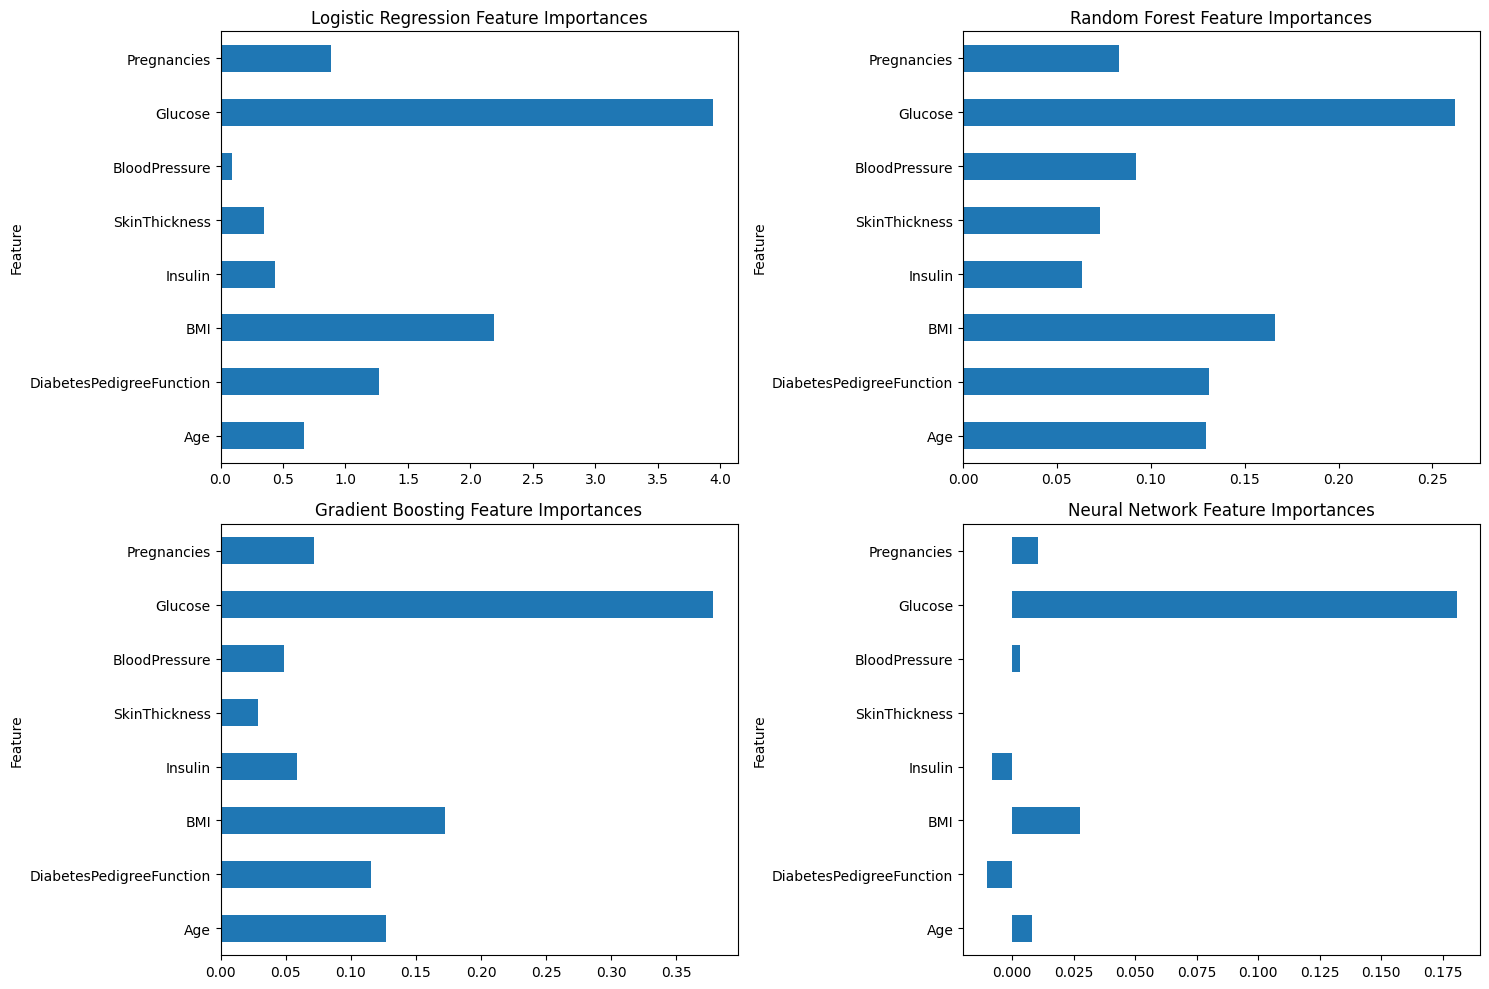

                          Logistic Regression  Random Forest  \
Feature                                                        
Pregnancies                          0.881826       0.083013   
Glucose                              3.939813       0.262203   
BloodPressure                        0.091512       0.092098   
SkinThickness                        0.349950       0.072990   
Insulin                              0.434770       0.063207   
BMI                                  2.189935       0.166320   
DiabetesPedigreeFunction             1.268534       0.131039   
Age                                  0.666235       0.129130   

                          Gradient Boosting  Neural Network  
Feature                                                      
Pregnancies                        0.071570        0.010484  
Glucose                            0.378091        0.180645  
BloodPressure                      0.048596        0.003226  
SkinThickness                      0.028629      

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_importances = np.abs(lr.coef_[0])

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_importances = gb.feature_importances_

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=300)
nn.fit(X_train, y_train)
# Permutation importance for Neural Network
nn_permutation_importance = permutation_importance(nn, X_test, y_test, n_repeats=10, random_state=42)
nn_importances = nn_permutation_importance.importances_mean

# Combine feature importances into a DataFrame
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression': lr_importances,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances,
    'Neural Network': nn_importances
})

importance_df = importance_df.set_index('Feature')

# Plotting the feature importances
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

importance_df['Logistic Regression'].plot(kind='barh', ax=axes[0, 0], title='Logistic Regression Feature Importances')
axes[0, 0].invert_yaxis()

importance_df['Random Forest'].plot(kind='barh', ax=axes[0, 1], title='Random Forest Feature Importances')
axes[0, 1].invert_yaxis()

importance_df['Gradient Boosting'].plot(kind='barh', ax=axes[1, 0], title='Gradient Boosting Feature Importances')
axes[1, 0].invert_yaxis()

importance_df['Neural Network'].plot(kind='barh', ax=axes[1, 1], title='Neural Network Feature Importances')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print(importance_df)


# **7. Model Training with Important Features**

In [ ]:
# Separate features and target variable
X_lr = data_no_outliers.drop(['Outcome','BloodPressure','SkinThickness','Insulin'], axis=1)
y_lr = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

# Split the data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and train the model
lr_model = LogisticRegression(max_iter=10000, C=0.1, penalty='l2', solver='lbfgs', random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluate the model
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
precision_lr = precision_score(y_test_lr, y_pred_lr)
recall_lr = recall_score(y_test_lr, y_pred_lr)
f1_lr = f1_score(y_test_lr, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_lr, lr_model.predict_proba(X_test_lr)[:, 1])
print("Logistic Regression")
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 Score: {f1_lr}')
print(f'ROC AUC: {roc_auc_lr}')
print(f'Classification Report:\n{classification_report(y_test_lr, y_pred_lr)}')

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
print(f'Confusion Matrix:\n{cm_lr}')

Logistic Regression
Accuracy: 0.7903225806451613
Precision: 1.0
Recall: 0.13333333333333333
F1 Score: 0.23529411764705882
ROC AUC: 0.9099290780141843
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       1.00      0.13      0.24        30

    accuracy                           0.79       124
   macro avg       0.89      0.57      0.56       124
weighted avg       0.84      0.79      0.72       124

Confusion Matrix:
[[94  0]
 [26  4]]


In [ ]:
# Separate features and target variable
X_rf = data_no_outliers.drop(['Outcome','SkinThickness','Insulin'], axis=1)
y_rf = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled_rf = scaler.fit_transform(X_rf)

# Split the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_scaled_rf, y_rf, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestClassifier(max_depth=120, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf)
recall_rf = recall_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_rf, rf_model.predict_proba(X_test_rf)[:, 1])
print("Random Forest")
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print(f'ROC AUC: {roc_auc_rf}')
print(f'Classification Report:\n{classification_report(y_test_rf, y_pred_rf)}')

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
print(f'Confusion Matrix:\n{cm_rf}')

Random Forest
Accuracy: 0.8629032258064516
Precision: 0.696969696969697
Recall: 0.7666666666666667
F1 Score: 0.7301587301587302
ROC AUC: 0.8897163120567376
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        94
           1       0.70      0.77      0.73        30

    accuracy                           0.86       124
   macro avg       0.81      0.83      0.82       124
weighted avg       0.87      0.86      0.87       124

Confusion Matrix:
[[84 10]
 [ 7 23]]


In [ ]:
# Separate features and target variable
X_gb = data_no_outliers.drop(['Outcome','SkinThickness','BloodPressure'], axis=1)
y_gb = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled_gb = scaler.fit_transform(X_gb)

# Split the data
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_scaled_gb, y_gb, test_size=0.2, random_state=42)

# Initialize and train the model
gb_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8, random_state=42)
gb_model.fit(X_train_gb, y_train_gb)

# Make predictions
y_pred_gb = gb_model.predict(X_test_gb)

# Evaluate the model
accuracy_gb = accuracy_score(y_test_gb, y_pred_gb)
precision_gb = precision_score(y_test_gb, y_pred_gb)
recall_gb = recall_score(y_test_gb, y_pred_gb)
f1_gb = f1_score(y_test_gb, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test_gb, gb_model.predict_proba(X_test_gb)[:, 1])
print("Gradient Boosting")
print(f'Accuracy: {accuracy_gb}')
print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'F1 Score: {f1_gb}')
print(f'ROC AUC: {roc_auc_gb}')
print(f'Classification Report:\n{classification_report(y_test_gb, y_pred_gb)}')

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test_gb, y_pred_gb)
print(f'Confusion Matrix:\n{cm_gb}')

Gradient Boosting
Accuracy: 0.8709677419354839
Precision: 0.7916666666666666
Recall: 0.6333333333333333
F1 Score: 0.7037037037037038
ROC AUC: 0.9039007092198582
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        94
           1       0.79      0.63      0.70        30

    accuracy                           0.87       124
   macro avg       0.84      0.79      0.81       124
weighted avg       0.87      0.87      0.87       124

Confusion Matrix:
[[89  5]
 [11 19]]


In [ ]:
# Separate features and target variable
X_mlp = data_no_outliers.drop(['Outcome','SkinThickness','Insulin','DiabetesPedigreeFunction'], axis=1)
y_mlp = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled_mlp = scaler.fit_transform(X_mlp)

# Split the data
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_scaled_mlp, y_mlp, test_size=0.2, random_state=42)

# Initialize and train the MLP model
mlp = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate='constant', max_iter=500, solver='adam',random_state=42)
mlp.fit(X_train_mlp, y_train_mlp)

# Make predictions
y_pred_mlp = mlp.predict(X_test_mlp)
y_prob_mlp = mlp.predict_proba(X_test_mlp)[:, 1]

# Evaluate the model
accuracy_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
precision_mlp = precision_score(y_test_mlp, y_pred_mlp)
recall_mlp = recall_score(y_test_mlp, y_pred_mlp)
f1_mlp = f1_score(y_test_mlp, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test_mlp, y_prob_mlp)
print("MLP Classifier")
print(f"Accuracy: {accuracy_mlp}")
print(f"Precision: {precision_mlp}")
print(f"Recall: {recall_mlp}")
print(f"F1 Score: {f1_mlp}")
print(f"ROC AUC: {roc_auc_mlp}")
print(f'Classification Report:\n{classification_report(y_test_mlp, y_pred_mlp)}')

# Print confusion matrix for MLP Classifier
cm_mlp = confusion_matrix(y_test_mlp, y_pred_mlp)
print(f'Confusion Matrix:\n{cm_mlp}')

MLP Classifier
Accuracy: 0.8629032258064516
Precision: 0.7096774193548387
Recall: 0.7333333333333333
F1 Score: 0.7213114754098361
ROC AUC: 0.8858156028368794
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        94
           1       0.71      0.73      0.72        30

    accuracy                           0.86       124
   macro avg       0.81      0.82      0.82       124
weighted avg       0.86      0.86      0.86       124

Confusion Matrix:
[[85  9]
 [ 8 22]]


# **8. Hyperparameter Tuning**

In [ ]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],  # Only include penalties supported by 'lbfgs'
    'solver': ['lbfgs', 'liblinear']  # Use solvers that support these penalties
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), param_grid_lr, cv=5, n_jobs=-1, verbose=2, scoring='precision')
grid_search_lr.fit(X_train_lr, y_train_lr)

# Best parameters and model evaluation
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test_lr)
print("Best Logistic Regression Parameters: ", grid_search_lr.best_params_)
print(f'Best Logistic Regression Accuracy: {accuracy_score(y_test_lr, y_pred_best_lr)}')
print(f'Best Logistic Regression Precision: {precision_score(y_test_lr, y_pred_best_lr)}')
print(f'Best Logistic Regression Recall: {recall_score(y_test_lr, y_pred_best_lr)}')
print(f'Best Logistic Regression F1 Score: {f1_score(y_test_lr, y_pred_best_lr)}')
print(f'Best Logistic Regression ROC AUC: {roc_auc_score(y_test_lr, best_lr_model.predict_proba(X_test_lr)[:, 1])}')
print(classification_report(y_test_lr, y_pred_best_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Logistic Regression Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.7903225806451613
Best Logistic Regression Precision: 1.0
Best Logistic Regression Recall: 0.13333333333333333
Best Logistic Regression F1 Score: 0.23529411764705882
Best Logistic Regression ROC AUC: 0.9099290780141843
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       1.00      0.13      0.24        30

    accuracy                           0.79       124
   macro avg       0.89      0.57      0.56       124
weighted avg       0.84      0.79      0.72       124



Results :

For best accuracy : 'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'

For best precision : 'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'

For best recall : 'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [200, 600, 1000, 1400],
    'max_depth': [10, 120, 230, 340],
     'max_features' : ['auto', 'sqrt','log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='recall')
grid_search_rf.fit(X_train_rf, y_train_rf)

# Best parameters and model evaluation
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_rf)
print("Best Random Forest Parameters: ", grid_search_rf.best_params_)
print(f'Best Random Forest Accuracy: {accuracy_score(y_test_rf, y_pred_best_rf)}')
print(f'Best Random Forest ROC AUC: {roc_auc_score(y_test_rf, best_rf_model.predict_proba(X_test_rf)[:, 1])}')
print(classification_report(y_test_rf, y_pred_best_rf))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Random Forest Parameters:  {'max_depth': 120, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Accuracy: 0.8629032258064516
Best Random Forest ROC AUC: 0.8897163120567376
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        94
           1       0.70      0.77      0.73        30

    accuracy                           0.86       124
   macro avg       0.81      0.83      0.82       124
weighted avg       0.87      0.86      0.87       124



Results :

For best accuracy : max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=1400

For best precision : max_depth=120, min_samples_leaf=4, min_samples_split=2, n_estimators=1400

For best recall : max_depth=120, min_samples_leaf=1, min_samples_split=10, n_estimators=200

In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, n_jobs=-1, verbose=2, scoring='precision')
grid_search_gb.fit(X_train_gb, y_train_gb)

# Best parameters and model evaluation
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test_gb)
print("Best Gradient Boosting Parameters: ", grid_search_gb.best_params_)
print(f'Best Gradient Boosting Accuracy: {accuracy_score(y_test_gb, y_pred_best_gb)}')
print(f'Best Gradient Boosting Precision: {precision_score(y_test_gb, y_pred_best_gb)}')
print(f'Best Gradient Boosting Recall: {recall_score(y_test_gb, y_pred_best_gb)}')
print(f'Best Gradient Boosting F1 Score: {f1_score(y_test_gb, y_pred_best_gb)}')
print(f'Best Gradient Boosting ROC AUC: {roc_auc_score(y_test_gb, best_gb_model.predict_proba(X_test_gb)[:, 1])}')
print(classification_report(y_test_gb, y_pred_best_gb))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Gradient Boosting Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Gradient Boosting Accuracy: 0.7983870967741935
Best Gradient Boosting Precision: 0.8571428571428571
Best Gradient Boosting Recall: 0.2
Best Gradient Boosting F1 Score: 0.32432432432432434
Best Gradient Boosting ROC AUC: 0.898936170212766
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        94
           1       0.86      0.20      0.32        30

    accuracy                           0.80       124
   macro avg       0.83      0.59      0.60       124
weighted avg       0.81      0.80      0.75       124



Results:

For best accuracy : learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8

For best precision : learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8

For best recall : learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.9

In [ ]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (64, 64), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [ 500, 700, 1000]
}

# Use the threading backend to avoid parallel processing issues
from sklearn.utils import parallel_backend

with parallel_backend('threading'):
    grid_search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=42, early_stopping=True, verbose=0), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='precision' )
    grid_search_mlp.fit(X_train_mlp, y_train_mlp)

# Print the best parameters and best score
print("Best Parameters:", grid_search_mlp.best_params_)
print("Best Score:", grid_search_mlp.best_score_)

# Best parameters and model evaluation
best_mlp_model = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp_model.predict(X_test_mlp)
print(f'Best Gradient Boosting Accuracy: {accuracy_score(y_test_mlp, y_pred_best_mlp)}')
print(f'Best Gradient Boosting ROC AUC: {roc_auc_score(y_test_mlp, best_mlp_model.predict_proba(X_test_mlp)[:, 1])}')
print(classification_report(y_test_mlp, y_pred_best_mlp))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=adam; total ti

Result :

For best accuracy : activation='tanh', alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate='constant', max_iter=500, solver='adam'

For best precision : activation='tanh', alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate='constant', max_iter=500, solver='adam'

For best recall : activation='relu', alpha=0.0001, hidden_layer_sizes=(64, 64), learning_rate='constant', max_iter=500, solver='sgd'

# **9. Training SVC and Naive Bayes Models , and Tuning**

In [ ]:
# Separate features and target variable
X_svm = data_no_outliers.drop(['Outcome'], axis=1)
y_svm = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled_svm = scaler.fit_transform(X_svm)

# Split the data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled_svm, y_svm, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(C=10, gamma=1, kernel='rbf', random_state=42, probability=True )

# Train the model
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions
y_pred_svm = svm_model.predict(X_test_svm)
y_prob_svm = svm_model.predict_proba(X_test_svm)[:, 1]

# Evaluate the model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test_svm, y_prob_svm)

print("SVM Classifier")

# Print evaluation metrics
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")
print(f"ROC AUC: {roc_auc_svm}")
print(f'Classification Report:\n{classification_report(y_test_svm, y_pred_svm)}')
# Confusion matrix
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
print(f'Confusion Matrix:\n{cm_svm}')

#C=10, gamma=1, kernel='rbf'
#C=100, gamma=0.1,kernel='rbf'

SVM Classifier
SVM Accuracy: 0.9032258064516129
SVM Precision: 0.8214285714285714
SVM Recall: 0.7666666666666667
SVM F1 Score: 0.793103448275862
ROC AUC: 0.9191489361702128
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        94
           1       0.82      0.77      0.79        30

    accuracy                           0.90       124
   macro avg       0.87      0.86      0.86       124
weighted avg       0.90      0.90      0.90       124

Confusion Matrix:
[[89  5]
 [ 7 23]]


In [ ]:
from sklearn.inspection import permutation_importance

# Train an SVM model
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# Compute permutation feature importance
result = permutation_importance(svm, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Print feature importance
feature_importance_svm = sorted(zip(result.importances_mean, X.columns), reverse=True)
print("Feature importance for SVM (non-linear kernel):")
for importance, name in feature_importance_svm:
    print(f"{name}: {importance}")


Feature importance for SVM (non-linear kernel):
Glucose: 0.17661290322580644
Age: 0.05026881720430103
BMI: 0.04946236559139781
DiabetesPedigreeFunction: 0.0258064516129032
Insulin: 0.017473118279569877
Pregnancies: 0.0129032258064516
SkinThickness: 0.011559139784946226
BloodPressure: 0.009946236559139777


In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['auto', 1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Initialize the SVM model
svm_model = SVC( random_state=42, probability=True )

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1, scoring='precision')

# Train the model with GridSearchCV
grid_search_svm.fit(X_train_svm, y_train_svm)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best Parameters for SVM: {best_params_svm}")
print(f"Best Cross-Validation Score for SVM: {best_score_svm}")

# Use the best estimator to make predictions
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_svm)

# Evaluate the best model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")

# Plot confusion matrix
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
print(cm_svm)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score for SVM: 0.7862831097351222
SVM Accuracy: 0.8467741935483871
SVM Precision: 0.7894736842105263
SVM Recall: 0.5
SVM F1 Score: 0.6122448979591837
[[90  4]
 [15 15]]


For best Accuracy : C=10, gamma=1, kernel='rbf'

For best Precision : C=1, gamma=0.1,kernel='rbf'

For Best Recall : C=100, gamma=0.1,kernel='rbf'

In [ ]:
# Separate features and target variable
X_nb = data_no_outliers.drop(['Outcome','SkinThickness','BloodPressure'], axis=1)
y_nb  = data_no_outliers['Outcome']

# Normalize the data
scaler = MinMaxScaler()
X_scaled_nb = scaler.fit_transform(X_nb)

# Split the data
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_scaled_nb, y_nb, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = GaussianNB(var_smoothing=0.01)

# Train the model
nb_model.fit(X_train_nb, y_train_nb)

# Make predictions
y_pred_nb = nb_model.predict(X_test_nb)
y_prob_nb = nb_model.predict_proba(X_test_nb)[:, 1]

# Evaluate the model
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
precision_nb = precision_score(y_test_nb, y_pred_nb)
recall_nb = recall_score(y_test_nb, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test_nb, y_prob_nb)

print("Naive Bayes")

# Print evaluation metrics
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Naive Bayes Recall: {recall_nb}")
print(f"ROC AUC: {roc_auc_nb}")
print(f'Classification Report:\n{classification_report(y_test_nb, y_pred_nb)}')
# confusion matrix
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
print(f'Confusion Matrix:\n{cm_nb}')

#var_smoothing=0.12328467394420659

Naive Bayes
Naive Bayes Accuracy: 0.8467741935483871
Naive Bayes Precision: 0.6571428571428571
Naive Bayes Recall: 0.7666666666666667
ROC AUC: 0.8925531914893617
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        94
           1       0.66      0.77      0.71        30

    accuracy                           0.85       124
   macro avg       0.79      0.82      0.80       124
weighted avg       0.86      0.85      0.85       124

Confusion Matrix:
[[82 12]
 [ 7 23]]


In [ ]:
# Train a Naive Bayes model
nb = GaussianNB()
nb.fit(X_train , y_train)

# Get the feature importance as the absolute difference of the means divided by the standard deviation
importance = abs(nb.theta_[1] - nb.theta_[0]) / nb.var_[0] ** 0.5

# Print feature importance
feature_importance_nb = sorted(zip(importance, X.columns), reverse=True)
print("Feature importance for Naive Bayes:")
for importance, name in feature_importance_nb:
    print(f"{name}: {importance}")


Feature importance for Naive Bayes:
Glucose: 1.2053459843075276
BMI: 0.6738575183682536
Age: 0.5048286771381691
Pregnancies: 0.46392761152185347
DiabetesPedigreeFunction: 0.44548960793656134
Insulin: 0.37371527511886754
BloodPressure: 0.36074997334681996
SkinThickness: 0.35517715846002545


In [ ]:
# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Initialize GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=5, verbose=2, n_jobs=-1, scoring='precision')

# Train the model with GridSearchCV
grid_search_nb.fit(X_train_nb, y_train_nb)

# Get the best parameters and best score
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print(f"Best Parameters for Naive Bayes: {best_params_nb}")
print(f"Best Cross-Validation Score for Naive Bayes: {best_score_nb}")

# Use the best estimator to make predictions
best_nb_model = grid_search_nb.best_estimator_
y_pred_nb = best_nb_model.predict(X_test_nb)

# Evaluate the best model
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
precision_nb = precision_score(y_test_nb, y_pred_nb)
recall_nb = recall_score(y_test_nb, y_pred_nb)
f1_nb = f1_score(y_test_nb, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Naive Bayes Recall: {recall_nb}")
print(f"Naive Bayes F1 Score: {f1_nb}")

# Plot confusion matrix
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
print(cm_nb)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Naive Bayes: {'var_smoothing': 0.8111308307896871}
Best Cross-Validation Score for Naive Bayes: 0.7174509803921569
Naive Bayes Accuracy: 0.8225806451612904
Naive Bayes Precision: 0.75
Naive Bayes Recall: 0.4
Naive Bayes F1 Score: 0.5217391304347827
[[90  4]
 [18 12]]


For best Accuracy : var_smoothing=0.12328467394420659

For best Precision : var_smoothing =  0.8111308307896871

For best Recall : var_smoothing=0.01

# **10. Stacked Ensemble Model**

In [ ]:
models = {
      'lr':lr_model,
      'rf':rf_model,
      'gb':gb_model,
      'mlp':mlp,
      'svm':svm_model,
      'nb':nb_model
}

predictions = {}

for name, model in models.items():
    predictions[name] = cross_val_predict(model, X_train, y_train, cv=5)

pred_df = pd.DataFrame(predictions)
print(pred_df.corr())

           lr        rf        gb       mlp       svm        nb
lr   1.000000  0.402066  0.447754  0.439350  0.421622  0.379753
rf   0.402066  1.000000  0.775245  0.726769  0.804096  0.664317
gb   0.447754  0.775245  1.000000  0.688530  0.739230  0.574143
mlp  0.439350  0.726769  0.688530  1.000000  0.741795  0.773552
svm  0.421622  0.804096  0.739230  0.741795  1.000000  0.687908
nb   0.379753  0.664317  0.574143  0.773552  0.687908  1.000000


In [ ]:
estimators = [
    ('logistic', lr_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('neural_network', mlp),
    ('svm', svm_model),
    ('naive_bayes', nb_model)
]

# Test different combinations
for i in range(2, len(estimators) + 1):
    for subset in itertools.combinations(estimators, i):
        subset_list = list(subset)
        stacked_model = StackingClassifier(estimators=subset_list, final_estimator=svm_model, passthrough=True, cv=5)
        stacked_model.fit(X_train, y_train)
        y_pred = stacked_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f'Combination: {[name for name, _ in subset]} :\n Accuracy: {accuracy} Precision: {precision}\n Recall: {recall} ROC AUC: {roc_auc}')
        cm = confusion_matrix(y_test, y_pred)
        print(f'{cm}\n -------------------------------------------------------------------')


Combination: ['logistic', 'random_forest'] :
 Accuracy: 0.8951612903225806 Precision: 0.84
 Recall: 0.7 ROC AUC: 0.8287234042553191
[[90  4]
 [ 9 21]]
 -------------------------------------------------------------------
Combination: ['logistic', 'gradient_boosting'] :
 Accuracy: 0.8870967741935484 Precision: 0.8333333333333334
 Recall: 0.6666666666666666 ROC AUC: 0.8120567375886525
[[90  4]
 [10 20]]
 -------------------------------------------------------------------
Combination: ['logistic', 'neural_network'] :
 Accuracy: 0.8709677419354839 Precision: 0.7916666666666666
 Recall: 0.6333333333333333 ROC AUC: 0.7900709219858155
[[89  5]
 [11 19]]
 -------------------------------------------------------------------
Combination: ['logistic', 'svm'] :
 Accuracy: 0.8790322580645161 Precision: 0.8
 Recall: 0.6666666666666666 ROC AUC: 0.8067375886524821
[[89  5]
 [10 20]]
 -------------------------------------------------------------------
Combination: ['logistic', 'naive_bayes'] :
 Accuracy: